In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zoo-animals-lifespan-dataset/AZA_MLE_Jul2018.csv


In [2]:
file_path = '/kaggle/input/zoo-animals-lifespan-dataset/AZA_MLE_Jul2018.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [3]:
data.head(10)

,Species Common Name,Scientific Name,TaxonClass,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient
0,Addax,Addax nasomaculatus,Mammalia,1215.0,13.4,12.4,14.5,558.0,12.3,10.5,14.7,656.0,14.4,13.0,15.1,NaN,NaN
1,"Agouti, Brazilian",Dasyprocta leporina,Mammalia,456.0,8.1,7.2,9.3,216.0,8.8,6.9,10.3,220.0,7.8,6.8,8.6,NaN,NaN
2,"Alligator, Chinese",Alligator sinensis,Reptilia,351.0,30.9,25.9,34.3,151.0,25.9,23.9,52.1,176.0,32.8,25.9,46,yes,yes
3,"Anoa, Lowland",Bubalus depressicornis,Mammalia,256.0,17.7,15.3,21.2,113.0,16.3,14.7,21.3,139.0,18.8,15.2,21.5,yes,yes
4,"Anteater, Giant",Myrmecophaga tridactyla,Mammalia,177.0,19.7,17.1,21.5,86.0,19.4,17.1,21.5,90.0,19.7,16.2,22,yes,yes
5,"Antelope, Roan",Hippotragus equinus,Mammalia,456.0,12.5,11.5,13.2,210.0,12.7,10.6,16.5,245.0,12.4,10.8,13.1,yes,NaN
6,"Antelope, Sable",Hippotragus niger,Mammalia,1398.0,11.3,10.5,11.9,602.0,10.6,9.8,12.0,795.0,11.6,10.5,12.2,NaN,NaN
7,"Aracari, Green",Pteroglossus viridis,Aves,358.0,7.9,6.3,9.3,174.0,8.5,6.1,10.9,175.0,7.6,6.2,8.9,NaN,NaN
8,"Argus, Great",Argusianus argusÊ,Aves,310.0,10.8,9.4,12.5,138.0,10.6,8.3,12.9,160.0,11.1,9.3,14.1,NaN,NaN
9,"Armadillo, Southern Three-banded",Tolypeutes matacas,Mammalia,233.0,17.6,15.0,18.8,109.0,16.4,12.6,18.1,124.0,18.7,15.2,21.7,yes,NaN


In [4]:
data.describe()

,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower
count,328.000000,328.000000,328.000000,328.000000,324.000000,324.000000,324.000000,314.000000,326.000000,326.00000,326.000000
mean,472.807927,13.404878,11.685671,14.976677,210.182099,13.391049,10.924691,15.387898,224.726994,13.45184,11.059509
std,472.047297,7.527497,6.736160,8.263849,198.729091,7.463315,6.364852,8.431720,209.396618,7.83753,6.862371
min,50.000000,2.400000,2.200000,2.700000,26.000000,2.600000,2.300000,3.000000,24.000000,2.40000,2.000000
25%,187.000000,7.800000,6.600000,9.075000,85.750000,7.900000,6.200000,9.400000,94.000000,7.42500,5.925000
50%,330.000000,12.050000,10.400000,13.500000,146.000000,11.550000,9.700000,13.400000,156.000000,11.80000,9.600000
75%,545.750000,16.625000,14.725000,18.800000,249.000000,17.300000,14.100000,19.775000,276.500000,16.57500,13.750000
max,3406.000000,47.000000,38.000000,52.900000,1425.000000,51.300000,41.300000,54.700000,1335.000000,43.30000,40.400000


In [5]:
data.info()
print(f"Number of unique values: {data['Species Common Name'].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species Common Name    330 non-null    object 
 1   Scientific Name        330 non-null    object 
 2   TaxonClass             330 non-null    object 
 3   Overall Sample Size    328 non-null    float64
 4   Overall MLE            328 non-null    float64
 5   Overall CI - lower     328 non-null    float64
 6   Overall CI - upper     328 non-null    float64
 7   Male Sample Size       324 non-null    float64
 8   Male MLE               324 non-null    float64
 9   Male CI - lower        324 non-null    float64
 10  Male CI - upper        314 non-null    float64
 11  Female Sample Size     326 non-null    float64
 12  Female MLE             326 non-null    float64
 13  Female CI - lower      326 non-null    float64
 14  Female CI - upper      319 non-null    object 
 15  Male D

**Cleaning**

In [6]:
data['Female CI - upper'] = pd.to_numeric(data['Female CI - upper'], errors='coerce') 
#error coerce  It will replace all non-numeric values with NaN.
#data.info()
data.describe()

,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower,Female CI - upper
count,328.000000,328.000000,328.000000,328.000000,324.000000,324.000000,324.000000,314.000000,326.000000,326.00000,326.000000,318.000000
mean,472.807927,13.404878,11.685671,14.976677,210.182099,13.391049,10.924691,15.387898,224.726994,13.45184,11.059509,15.321698
std,472.047297,7.527497,6.736160,8.263849,198.729091,7.463315,6.364852,8.431720,209.396618,7.83753,6.862371,8.751133
min,50.000000,2.400000,2.200000,2.700000,26.000000,2.600000,2.300000,3.000000,24.000000,2.40000,2.000000,2.700000
25%,187.000000,7.800000,6.600000,9.075000,85.750000,7.900000,6.200000,9.400000,94.000000,7.42500,5.925000,9.025000
50%,330.000000,12.050000,10.400000,13.500000,146.000000,11.550000,9.700000,13.400000,156.000000,11.80000,9.600000,13.850000
75%,545.750000,16.625000,14.725000,18.800000,249.000000,17.300000,14.100000,19.775000,276.500000,16.57500,13.750000,18.575000
max,3406.000000,47.000000,38.000000,52.900000,1425.000000,51.300000,41.300000,54.700000,1335.000000,43.30000,40.400000,52.900000


In [7]:
numerical_cols = data.select_dtypes(include=['float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species Common Name    330 non-null    object 
 1   Scientific Name        330 non-null    object 
 2   TaxonClass             330 non-null    object 
 3   Overall Sample Size    330 non-null    float64
 4   Overall MLE            330 non-null    float64
 5   Overall CI - lower     330 non-null    float64
 6   Overall CI - upper     330 non-null    float64
 7   Male Sample Size       330 non-null    float64
 8   Male MLE               330 non-null    float64
 9   Male CI - lower        330 non-null    float64
 10  Male CI - upper        330 non-null    float64
 11  Female Sample Size     330 non-null    float64
 12  Female MLE             330 non-null    float64
 13  Female CI - lower      330 non-null    float64
 14  Female CI - upper      330 non-null    float64
 15  Male D

In [8]:
data['Male Data Deficient'] = data['Male Data Deficient'].fillna('No')
data['Female Data Deficient'] = data['Female Data Deficient'].fillna('No')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species Common Name    330 non-null    object 
 1   Scientific Name        330 non-null    object 
 2   TaxonClass             330 non-null    object 
 3   Overall Sample Size    330 non-null    float64
 4   Overall MLE            330 non-null    float64
 5   Overall CI - lower     330 non-null    float64
 6   Overall CI - upper     330 non-null    float64
 7   Male Sample Size       330 non-null    float64
 8   Male MLE               330 non-null    float64
 9   Male CI - lower        330 non-null    float64
 10  Male CI - upper        330 non-null    float64
 11  Female Sample Size     330 non-null    float64
 12  Female MLE             330 non-null    float64
 13  Female CI - lower      330 non-null    float64
 14  Female CI - upper      330 non-null    float64
 15  Male D

In [9]:
# 4. Add a column for the difference in life expectancy between males and females
data['Life Expectancy Difference'] = data['Female MLE'] - data['Male MLE']
data.columns

Index(['Species Common Name', 'Scientific Name', 'TaxonClass',
       'Overall Sample Size ', 'Overall MLE', 'Overall CI - lower',
       'Overall CI - upper', 'Male Sample Size', 'Male MLE', 'Male CI - lower',
       'Male CI - upper', 'Female Sample Size ', 'Female MLE',
       'Female CI - lower', 'Female CI - upper', 'Male Data Deficient',
       'Female Data Deficient', 'Life Expectancy Difference'],
      dtype='object')

# Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


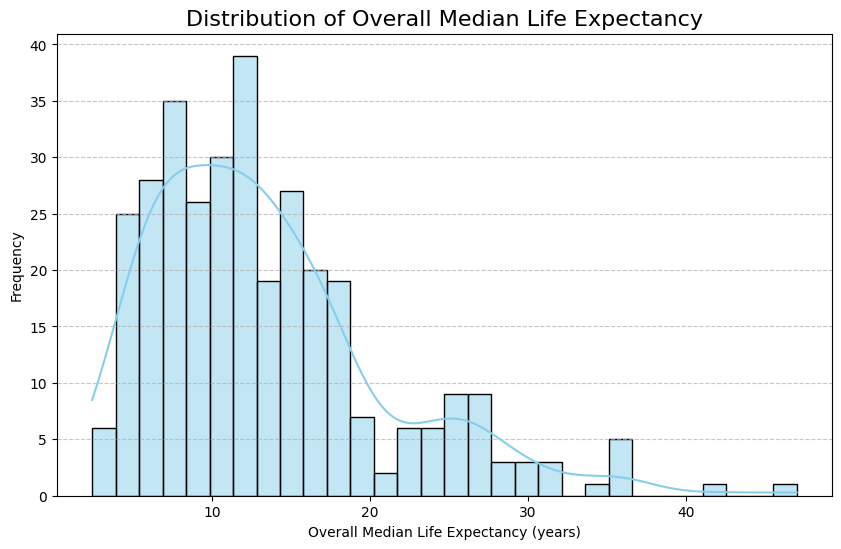

None


In [11]:
# Distribution of overall life expectancy
plt.figure(figsize=(10, 6))
sns.histplot(data['Overall MLE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Overall Median Life Expectancy', fontsize=16)
plt.xlabel('Overall Median Life Expectancy (years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


import plotly.express as px

fig = px.histogram(
    data_frame=data,
    x='Overall MLE',  # Corrected to match the column name in your DataFrame
    nbins=25,  # Number of bins
    title="Histogram of Overall Median Life Expectancy",
    color_discrete_sequence=['green']  # Optional, adds a red color to the bars
)

fig.update_layout(
    height=600,
    width=700,
    title_font=dict(size=20, color='darkblue'),
    bargap=0.01
)

print(fig.show())

**Insights**- It shows the peaks graph in between 0 to 20 years. So, it means the life expectancy is good between 0-20 years. Then there is sharp decline in the frequency after 20 years till 30 years. 

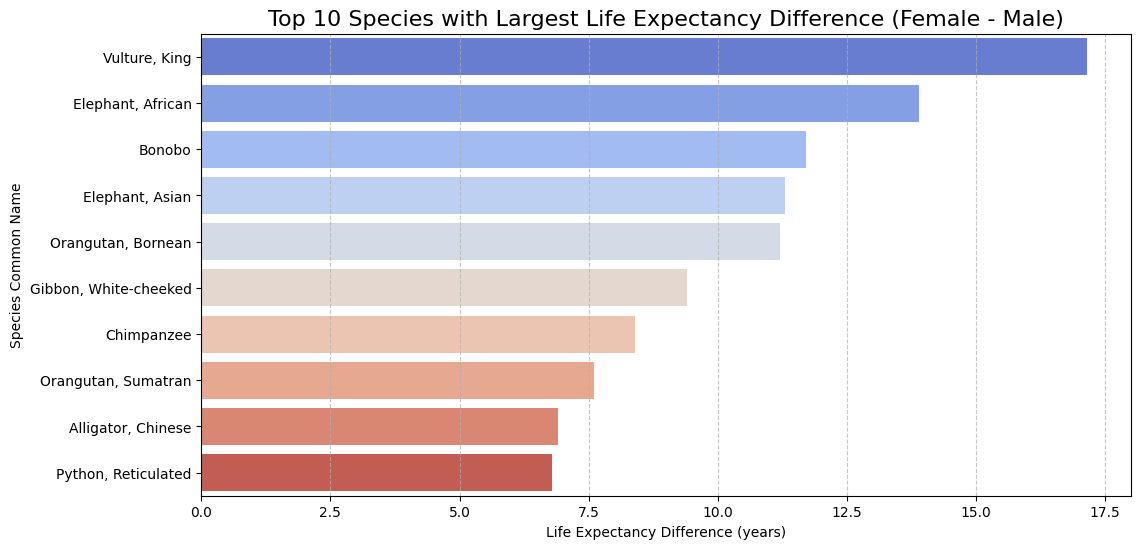

None


In [12]:
# Top 10 species with the largest life expectancy difference
top_diff = data.nlargest(10, 'Life Expectancy Difference')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_diff, x='Life Expectancy Difference', y='Species Common Name', palette='coolwarm')
plt.title('Top 10 Species with Largest Life Expectancy Difference (Female - Male)', fontsize=16)
plt.xlabel('Life Expectancy Difference (years)')
plt.ylabel('Species Common Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



dant = data.nlargest(10, 'Life Expectancy Difference')
#print(dant)
fig_channel_type_count = px.bar(
    dant,
    x='Species Common Name',  # Column for the x-axis
    y='Life Expectancy Difference',  # Column for the y-axis
    title="Top 10 Species with Largest Count",
    color_discrete_sequence=['Red'],
)
fig_channel_type_count.update_layout(
    width=900,  # Chart width
    height=600,  # Chart height
    title_font=dict(size=20, color='darkblue'),  # Title font size and color
    xaxis_title="Species Common Name",  # X-axis title
    yaxis_title="Life Expectancy Difference (years)",  # Y-axis title
    bargap=0.2  # Space between bars
)

print(fig_channel_type_count.show())

Insights= There is high life expectancy difference between male and female in vulture is hgihest.

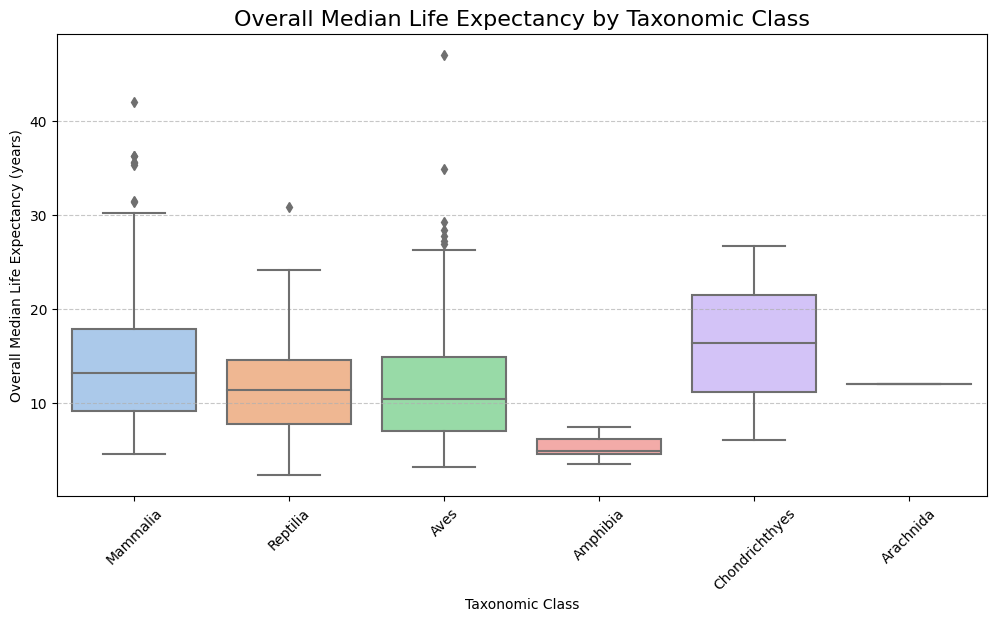

None


In [13]:
# Life expectancy by taxonomic class
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='TaxonClass', y='Overall MLE', palette='pastel')
plt.title('Overall Median Life Expectancy by Taxonomic Class', fontsize=16)
plt.xlabel('Taxonomic Class')
plt.ylabel('Overall Median Life Expectancy (years)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


fig_engagement_country = px.box(
    data, x='TaxonClass', y='Overall MLE',
    title="Overall Median Life Expectancy by Taxonomic Class",
    color='TaxonClass'
)
print(fig_engagement_country.show())

Insight=  the dataset shows high variability in MLF in mammalia, aves and reptilia. while chondrichthyes indicate less variability and is more consistent and doesn't have extreme values.


In [14]:
#data.columns

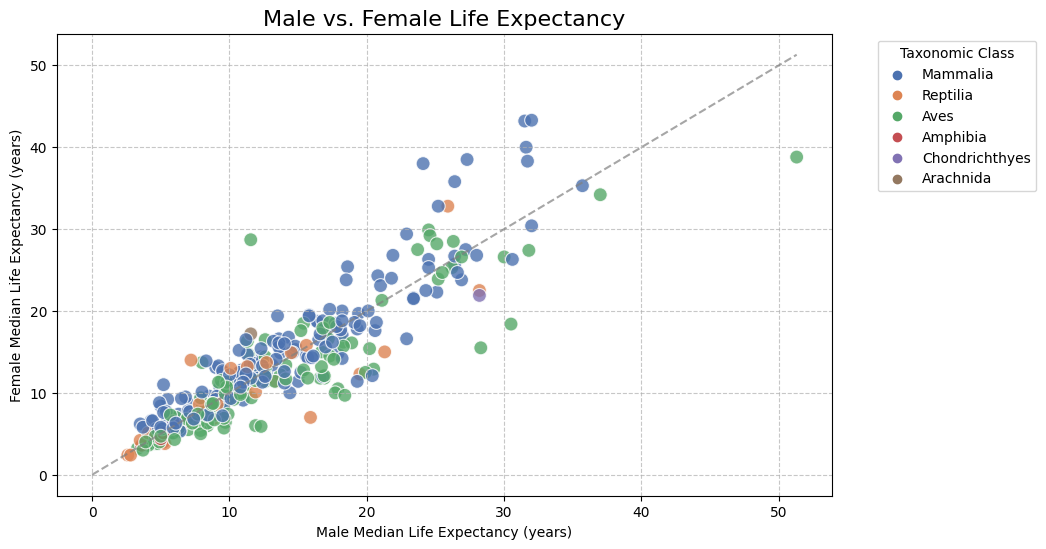

In [15]:
# Comparison of male vs. female life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Male MLE', y='Female MLE', hue='TaxonClass', palette='deep', s=100, alpha=0.8)
plt.plot([0, max(data['Male MLE'])], [0, max(data['Male MLE'])], color='gray', linestyle='--', alpha=0.7)
plt.title('Male vs. Female Life Expectancy', fontsize=16)
plt.xlabel('Male Median Life Expectancy (years)')
plt.ylabel('Female Median Life Expectancy (years)')
plt.legend(title='Taxonomic Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


fig_engagement_vs_views = px.scatter(
    data, x='Male MLE', y='Female MLE',
    title="Male vs. Female Life Expectancy",
    color='TaxonClass',  # Use color for distinction
    hover_name='TaxonClass',
    labels={'Life Expectancy Difference': 'Life Expectancy Difference', 'Species Common Name': 'Species Common Name'}
)
fig_engagement_vs_views.show()


From this Aves shows no clear pattern, there is no correlation between the variables.
however the points in mammalia, the points tend to rise from left to right (i.e., as one variable increases, the other also increases), there is a positive correlation.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



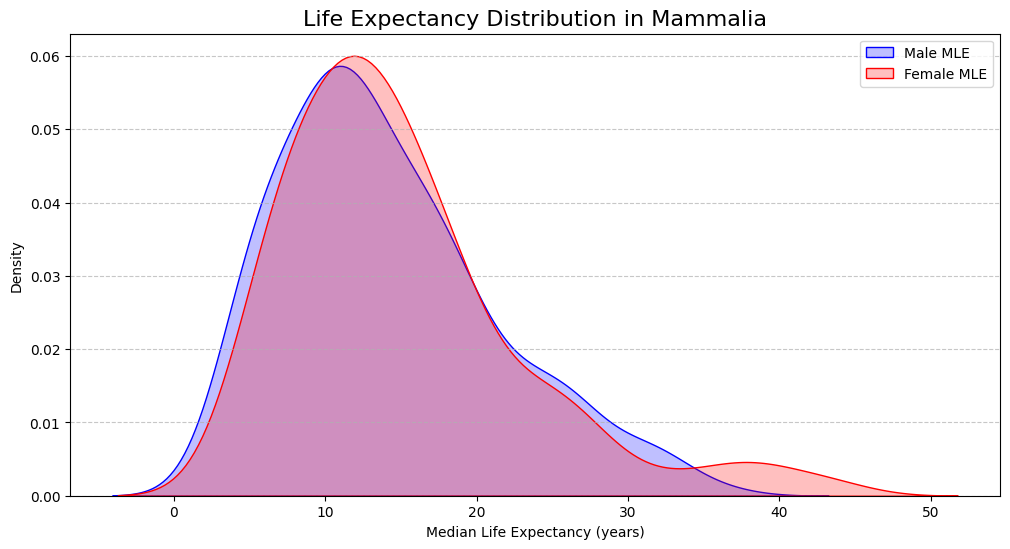

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Male and female life expectancy distribution for "Mammalia"
mammalia = data[data['TaxonClass'] == 'Mammalia']

plt.figure(figsize=(12, 6))
sns.kdeplot(mammalia['Male MLE'], label='Male MLE', fill=True, color='blue')  # Replaced shade with fill
sns.kdeplot(mammalia['Female MLE'], label='Female MLE', fill=True, color='red')  # Replaced shade with fill

plt.title('Life Expectancy Distribution in Mammalia', fontsize=16)
plt.xlabel('Median Life Expectancy (years)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import plotly.figure_factory as ff

# Filter data for Mammalia
mammalia = data[data['TaxonClass'] == 'Mammalia']

# Create KDE plots for Male MLE and Female MLE
fig = ff.create_distplot(
    [mammalia['Male MLE'], mammalia['Female MLE']],  # Data
    group_labels=['Male MLE', 'Female MLE'],  # Labels
    colors=['blue', 'red'],  # Colors for each distribution
    show_hist=False,  # Hides the histogram
    show_rug=False  # Hides the rug plot
)

# Update the layout
fig.update_layout(
    title='Life Expectancy Distribution in Mammalia',
    xaxis_title='Median Life Expectancy (years)',
    yaxis_title='Density',
    legend=dict(title='Legend'),
    width=800,
    height=500
)

# Show the figure
fig.show()


Right Skewed
Female Mammalian lives longer than male.

<Figure size 1200x600 with 0 Axes>

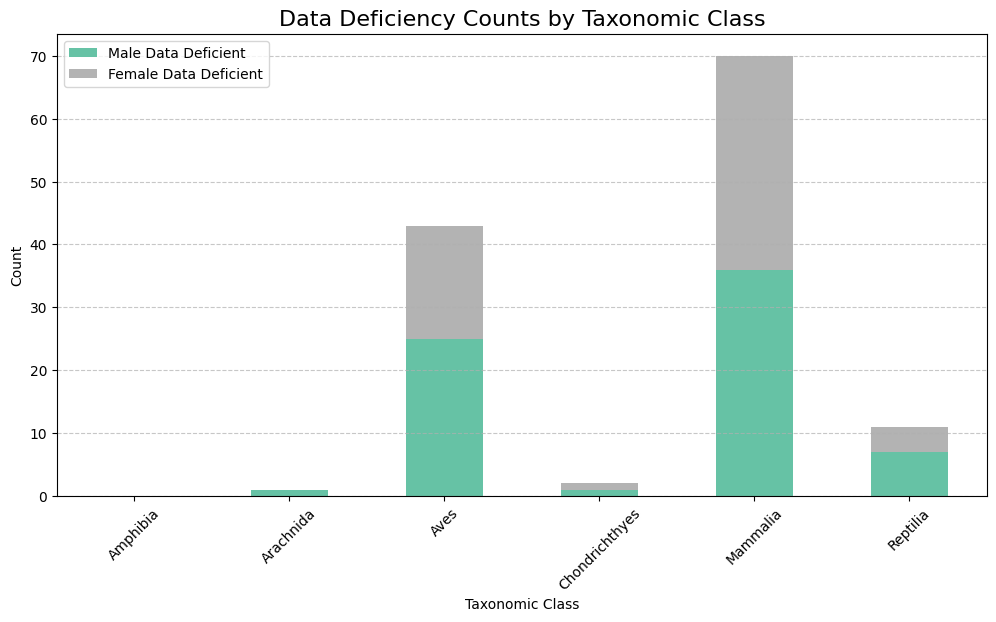

In [17]:
# Data deficiency counts by taxonomic class
plt.figure(figsize=(12, 6))
data_deficiency = data.groupby('TaxonClass')[['Male Data Deficient', 'Female Data Deficient']].apply(
    lambda x: (x == 'yes').sum()
)
data_deficiency.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))
plt.title('Data Deficiency Counts by Taxonomic Class', fontsize=16)
plt.xlabel('Taxonomic Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#using plotly
import plotly.graph_objects as go

# Data preparation
data_deficiency = data.groupby('TaxonClass')[['Male Data Deficient', 'Female Data Deficient']].apply(
    lambda x: (x == 'yes').sum()
).reset_index()

# Create the stacked bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=data_deficiency['TaxonClass'],
    y=data_deficiency['Male Data Deficient'],
    name='Male Data Deficient',
    marker_color='blue'
))

# Add Female Data Deficient
fig.add_trace(go.Bar(
    x=data_deficiency['TaxonClass'],
    y=data_deficiency['Female Data Deficient'],
    name='Female Data Deficient',
    marker_color='pink'
))

# Update layout for stacked bar
fig.update_layout(
    barmode='stack',
    title='Data Deficiency Counts by Taxonomic Class',
    xaxis=dict(title='Taxonomic Class', tickangle=45),
    yaxis_title='Count',
    legend_title='Legend',
    width=900,
    height=600,
    template='plotly_white'
)

# Show the figure
fig.show()

However the data deficiency of mammalia is highest.

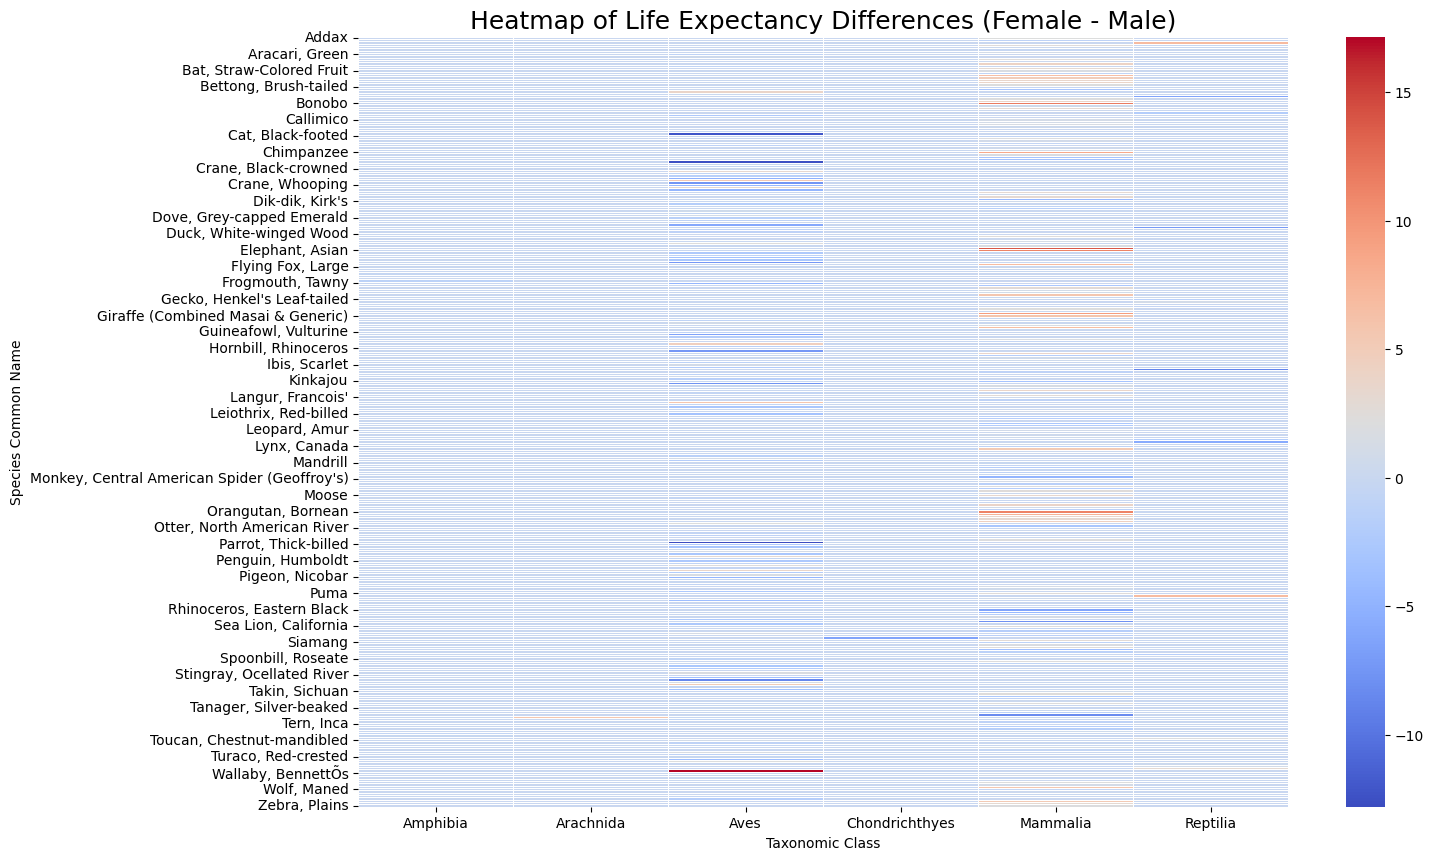

In [18]:
 # Heatmap for life expectancy differences by taxonomic class and species
 pivot_data = data.pivot_table(
     index='Species Common Name', columns='TaxonClass', values='Life Expectancy Difference', aggfunc='mean'
 ).fillna(0)
 plt.figure(figsize=(15, 10))
 sns.heatmap(pivot_data, cmap='coolwarm', annot=False, linewidths=0.5)
 plt.title('Heatmap of Life Expectancy Differences (Female - Male)', fontsize=18)
 plt.xlabel('Taxonomic Class')
 plt.ylabel('Species Common Name')
 plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



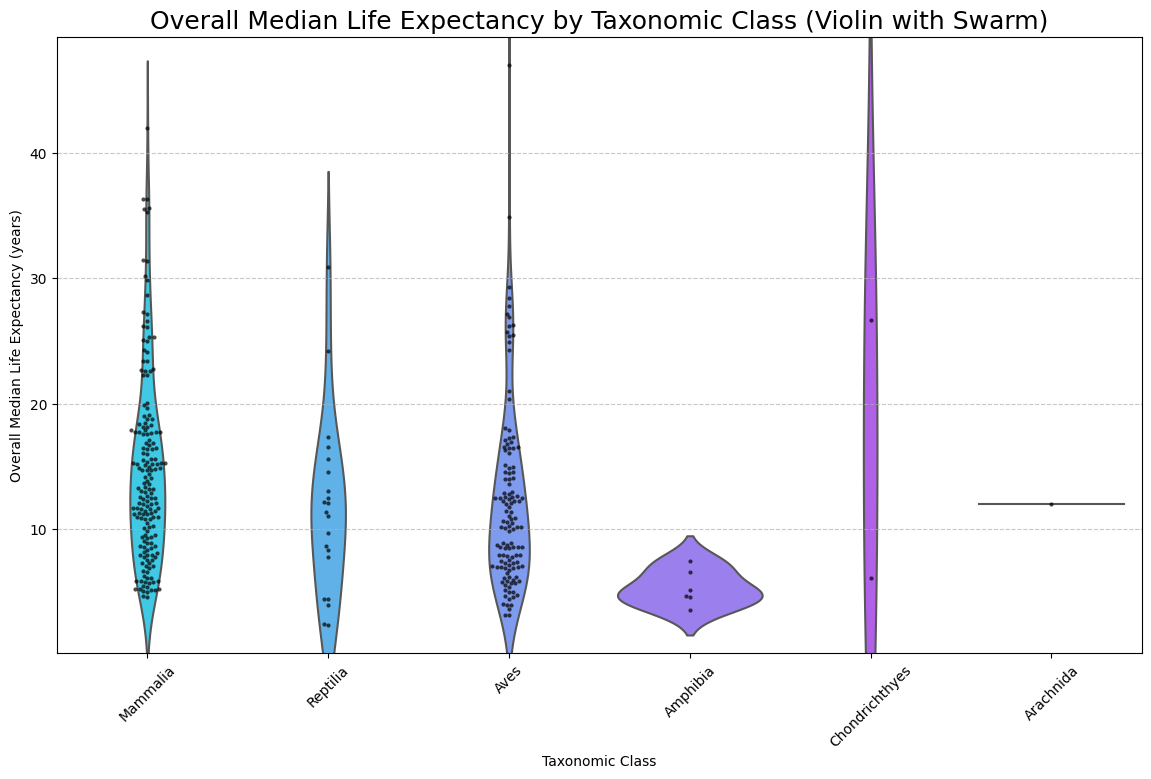

In [19]:
# Violin plot with swarm overlay for overall life expectancy by class
plt.figure(figsize=(14, 8))
sns.violinplot(data=data, x='TaxonClass', y='Overall MLE', inner=None, palette="cool")
sns.swarmplot(data=data, x='TaxonClass', y='Overall MLE', color='k', alpha=0.7, size=3)
plt.title('Overall Median Life Expectancy by Taxonomic Class (Violin with Swarm)', fontsize=18)
plt.xlabel('Taxonomic Class')
plt.ylabel('Overall Median Life Expectancy (years)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()